
## MC 模拟：AR(1) 过程与单位根过程


> 提示词：

- 目的：模拟分析单位根过程和平稳 AR(1) 过程的时序特征
- 数据：生成单位根过程和 AR(1) 过程的随机数，每种各 100 个序列，T = 50 期
- 图示：绘制上述两种过程的时序图，一共绘制三幅图形
  - 风格1：两个序列分别绘制在两个子图中，1 行 2 列
  - 风格2：两个序列绘制在同一个子图中，使用不同颜色区分
  - 风格3：两个序列绘制在同一个子图中，显示每个时点上的均值和 95% 置信区间
- 标注：添加标题、坐标轴标签、图例等
  - 用 latex 语法添加数学公式
- 参考风格：https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html
- 配文：讲义风格；语言平实；不要添加任何表情符号
  - 整体介绍：Markdown 文本框
    - 介绍该模拟项目的目的，DGP 思路和公式；
    - 平稳性的概念；
    - AR(1) 过程和单位根过程的的数学表达式；
    - 平稳性特征 (具体说明两个序列的均值和方差是否满足平稳性的定义)；
    - 预期验证的主要结论
  - 每个风格的图形配一个 Markdown 文本框
    - 解释该图形的要点
    - 总结从该图的模拟数据中得到的核心结论
- 输出：
  - 配文：Markdown 格式或可以复制为 Markdown 格式的文本
  - 代码：Python 代码
  - 图形：PNG 格式的图片，存储到当前工作路径下的 figs 文件夹中 (若无，则创建)

In [3]:
import os
os.chdir(r"D:\github\dslian\body")

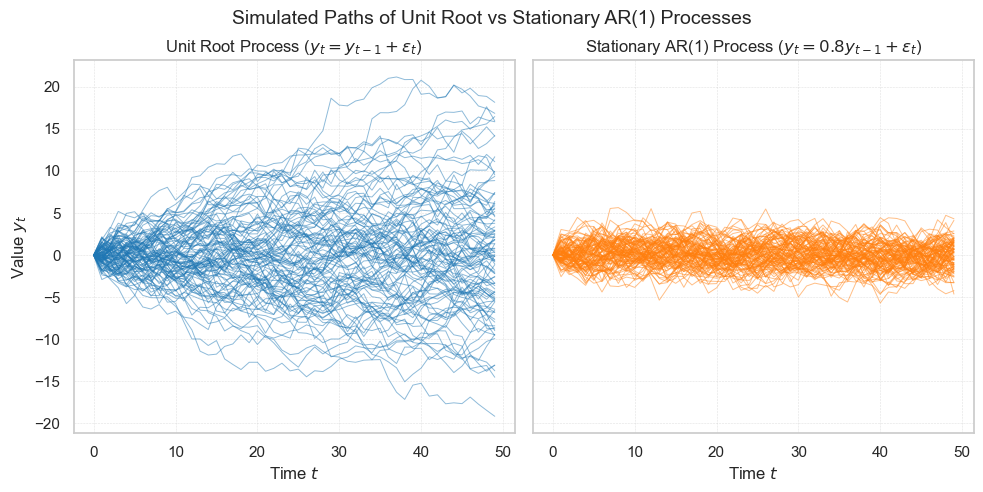

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 模拟参数
N = 100         # 模拟序列个数
T = 50         # 时间长度
phi = 0.8      # AR(1) 系数, eg. 0.01, 0.8, 0.95, 0.97
np.random.seed(142)

# 生成单位根过程
unit_root = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        unit_root[i, t] = unit_root[i, t-1] + eps[t]

# 生成平稳 AR(1) 过程
ar1 = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        ar1[i, t] = phi * ar1[i, t-1] + eps[t]

# 绘图：分两张子图分别绘制每条路径
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# 左图：单位根过程
for i in range(N):
    axes[0].plot(unit_root[i], color='tab:blue', alpha=0.5, linewidth=0.7)
axes[0].set_title("Unit Root Process ($y_t = y_{t-1} + \\varepsilon_t$)")
axes[0].set_xlabel("Time $t$")
axes[0].set_ylabel("Value $y_t$")
axes[0].grid(True, linestyle="--", linewidth=0.4, alpha=0.6)

# 右图：平稳 AR(1) 过程
for i in range(N):
    axes[1].plot(ar1[i], color='tab:orange', alpha=0.5, linewidth=0.7)
axes[1].set_title(f"Stationary AR(1) Process ($y_t = {phi} y_{{t-1}} + \\varepsilon_t$)")
axes[1].set_xlabel("Time $t$")
axes[1].grid(True, linestyle="--", linewidth=0.4, alpha=0.6)

# 总标题与美化
plt.suptitle("Simulated Paths of Unit Root vs Stationary AR(1) Processes", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)

import os

# Ensure the directories exist
os.makedirs(r"figs", exist_ok=True)
os.makedirs(r"..\codes\figs", exist_ok=True)

plt.savefig(r"figs\TS_unit_root_vs_ar1_01.png", dpi=200, bbox_inches='tight')
plt.savefig(r"..\codes\figs\TS_unit_root_vs_ar1_01.png", dpi=200, bbox_inches='tight')

plt.show()


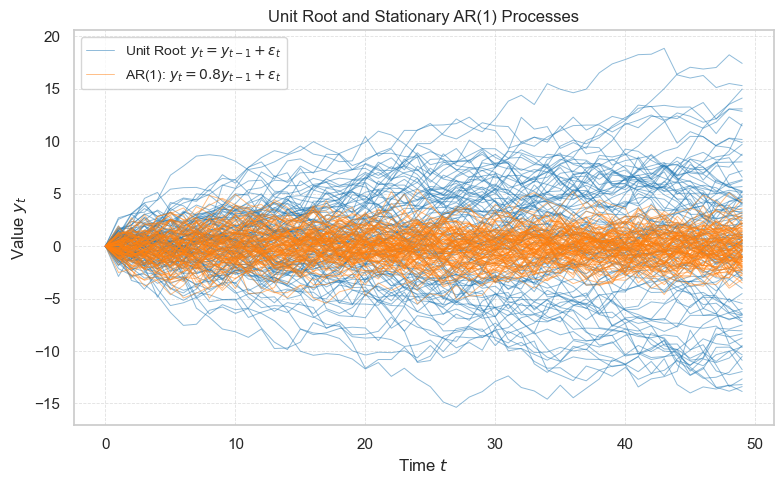

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
#sns.set(style="whitegrid")
#plt.rcParams["figure.figsize"] = (5, 5)

# 模拟参数
N = 100         # 模拟序列个数
T = 50         # 时间长度
phi = 0.8      # AR(1) 系数
np.random.seed(42)

# 生成单位根过程
unit_root = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        unit_root[i, t] = unit_root[i, t-1] + eps[t]

# 生成平稳 AR(1) 过程
ar1 = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        ar1[i, t] = phi * ar1[i, t-1] + eps[t]

# 绘图：将两类过程放在同一图中
plt.figure(figsize=(8, 5))

# 绘制单位根路径
for i in range(N):
    plt.plot(unit_root[i], color='tab:blue', alpha=0.5, linewidth=0.7,
             label=r"Unit Root: $y_t = y_{t-1} + \varepsilon_t$" if i == 0 else "")

# 绘制平稳 AR(1) 路径
for i in range(N):
    plt.plot(ar1[i], color='tab:orange', alpha=0.5, linewidth=0.7,
             label=fr"AR(1): $y_t = {phi} y_{{t-1}} + \varepsilon_t$" if i == 0 else "")

# 图形修饰
plt.title("Unit Root and Stationary AR(1) Processes", fontsize=12)
plt.xlabel("Time $t$", fontsize=12)
plt.ylabel("Value $y_t$", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)
plt.tight_layout()

plt.savefig(r"figs\TS_unit_root_vs_ar1_02.png", dpi=200, bbox_inches='tight')
plt.savefig(r"..\codes\figs\TS_unit_root_vs_ar1_02.png", dpi=100, bbox_inches='tight')

plt.show()


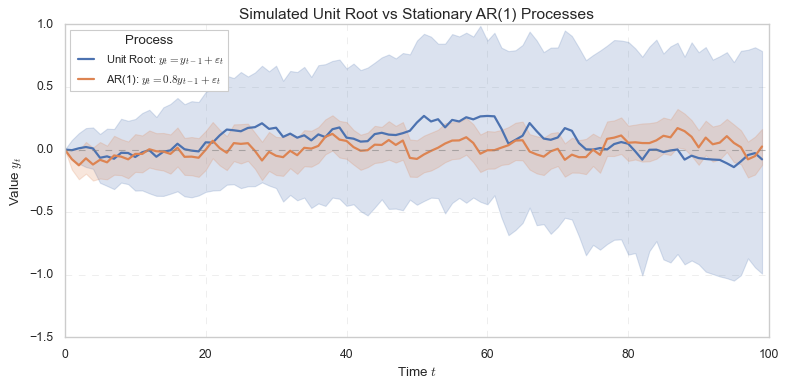

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 模拟参数
N = 500
T = 100
phi = 0.8
np.random.seed(42)

# 生成单位根过程
unit_root = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        unit_root[i, t] = unit_root[i, t-1] + eps[t]

# 生成平稳 AR(1) 过程
ar1 = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        ar1[i, t] = phi * ar1[i, t-1] + eps[t]

# 整理为 long-form DataFrame
def to_long_df(data, label):
    df = pd.DataFrame(data)
    df = df.reset_index().melt(id_vars="index", var_name="Time", value_name="Value")
    df["Process"] = label
    df.rename(columns={"index": "Series"}, inplace=True)
    df["Time"] = df["Time"].astype(int)
    return df

df_ur = to_long_df(unit_root, r"Unit Root: $y_t = y_{t-1} + \varepsilon_t$")
df_ar = to_long_df(ar1, fr"AR(1): $y_t = {phi} y_{{t-1}} + \varepsilon_t$")
df_all = pd.concat([df_ur, df_ar], ignore_index=True)

# 绘图
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_all, x="Time", y="Value", hue="Process",
             estimator="mean", ci=95, linewidth=2)

# 添加 y = 0 的水平虚线
plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# 图形修饰
plt.title("Simulated Unit Root vs Stationary AR(1) Processes", fontsize=14)
plt.xlabel("Time $t$", fontsize=12)
plt.ylabel("Value $y_t$", fontsize=12)
plt.legend(title="Process", fontsize=10, loc='upper left')
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


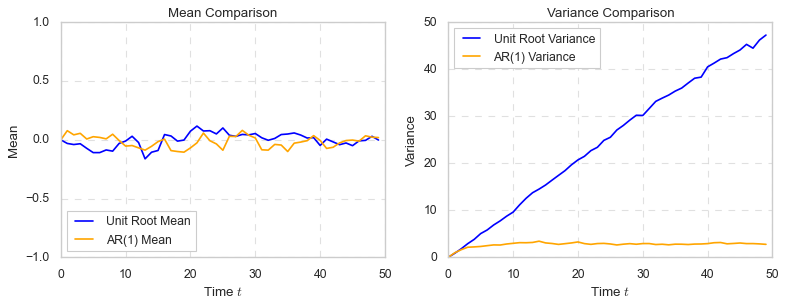

In [80]:
import numpy as np

import matplotlib.pyplot as plt

# 模拟参数
N = 500         # 模拟序列个数
T = 50          # 时间长度
phi = 0.8       # AR(1) 系数
np.random.seed(42)

# 生成单位根过程
unit_root = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        unit_root[i, t] = unit_root[i, t-1] + eps[t]

# 生成平稳 AR(1) 过程
ar1 = np.zeros((N, T))
for i in range(N):
    eps = np.random.normal(size=T)
    for t in range(1, T):
        ar1[i, t] = phi * ar1[i, t-1] + eps[t]

# 计算单位根过程和 AR(1) 过程的均值和方差
unit_root_mean = unit_root.mean(axis=0)
unit_root_var = unit_root.var(axis=0)

ar1_mean = ar1.mean(axis=0)
ar1_var = ar1.var(axis=0)

# 绘制均值和方差随时间变化的图
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 均值对比
axes[0].plot(range(T), unit_root_mean, label="Unit Root Mean", color="blue")
axes[0].plot(range(T), ar1_mean, label="AR(1) Mean", color="orange")
axes[0].set_title("Mean Comparison")
axes[0].set_xlabel("Time $t$")
axes[0].set_ylabel("Mean")
axes[0].set_ylim(-1, 1)
axes[0].legend(loc="lower left")
axes[0].grid(True, linestyle="--", alpha=0.6)

# 方差对比
axes[1].plot(range(T), unit_root_var, label="Unit Root Variance", color="blue")
axes[1].plot(range(T), ar1_var, label="AR(1) Variance", color="orange")
axes[1].set_title("Variance Comparison")
axes[1].set_xlabel("Time $t$")
axes[1].set_ylabel("Variance")
axes[1].legend(loc="upper left")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## 函数式编程：提高代码可读性

> 提示词 Round 1：  
> - 上一个 cell 中的代码可以通过预先定义函数来提高可读性和复用性。  
> - 例如，可以定义生成单位根过程和 AR(1) 过程的函数，这样可以避免重复代码，并使逻辑更加清晰。  
> - 此外，还可以将绘图部分封装为函数，以便更灵活地调整参数或重复使用绘图逻辑。  
> - 考虑函数的输入参数和返回值设计，使其通用性更强。

> 提示词 Round 2：

根据上一个 cell 的提示词生成 Python 代码

AR1和Unit root 共用一个函数就行了吧

'generate_time_series_process()' 太繁琐了，改成 simu_AR() 即可

'def plot_mean_variance_comparison(unit_root, ar1, T):' 函数也可以写成一个通用函数，同时适用于 AR1 和 Unit Root

In [4]:
%reset -f

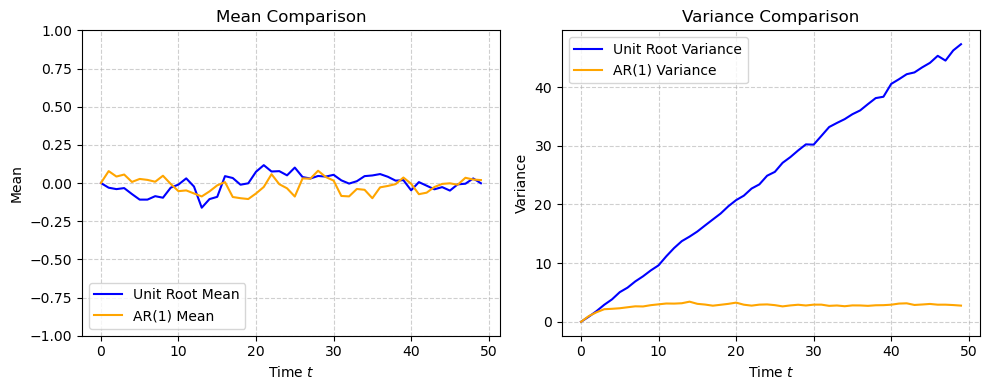

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义生成时间序列的函数
def simu_AR(N, T, phi, process_type="AR1", seed=None):
    """
    生成时间序列数据
    :param N: 序列个数
    :param T: 时间长度
    :param phi: AR(1) 系数
    :param process_type: "AR1" 或 "UnitRoot"
    :param seed: 随机种子
    :return: 生成的时间序列数组
    """
    if seed is not None:
        np.random.seed(seed)
    
    series = np.zeros((N, T))
    for i in range(N):
        eps = np.random.normal(size=T)
        for t in range(1, T):
            if process_type == "AR1":
                series[i, t] = phi * series[i, t-1] + eps[t]
            elif process_type == "UnitRoot":
                series[i, t] = series[i, t-1] + eps[t]
            else:
                raise ValueError("Invalid process_type. Choose 'AR1' or 'UnitRoot'.")
    return series

# 定义绘制均值和方差对比的函数
def plot_mean_variance_comparison(series1, series2, T, labels):
    """
    绘制均值和方差对比图
    :param series1: 第一个时间序列
    :param series2: 第二个时间序列
    :param T: 时间长度
    :param labels: 两个序列的标签
    """
    mean1, var1 = series1.mean(axis=0), series1.var(axis=0)
    mean2, var2 = series2.mean(axis=0), series2.var(axis=0)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # 均值对比
    axes[0].plot(range(T), mean1, label=f"{labels[0]} Mean", color="blue")
    axes[0].plot(range(T), mean2, label=f"{labels[1]} Mean", color="orange")
    axes[0].set_title("Mean Comparison")
    axes[0].set_xlabel("Time $t$")
    axes[0].set_ylabel("Mean")
    axes[0].set_ylim(-1, 1)
    axes[0].legend(loc="lower left")
    axes[0].grid(True, linestyle="--", alpha=0.6)

    # 方差对比
    axes[1].plot(range(T), var1, label=f"{labels[0]} Variance", color="blue")
    axes[1].plot(range(T), var2, label=f"{labels[1]} Variance", color="orange")
    axes[1].set_title("Variance Comparison")
    axes[1].set_xlabel("Time $t$")
    axes[1].set_ylabel("Variance")
    axes[1].legend(loc="upper left")
    axes[1].grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# 使用函数生成数据
N = 500         # 模拟序列个数, N<400 和 N>500 的结果有何区别？
T = 50          # 时间长度
phi = 0.8       # AR(1) 系数，可以尝试 0.3, 0.8, 0.95, 0.97 等数值；
                #            不要尝试 1.01 或更大的数值，会「爆炸」的！
seed = np.random.seed(42)

# 生成单位根和 AR(1) 过程
unit_root = simu_AR(N, T, phi, process_type="UnitRoot", seed=seed)
ar1 = simu_AR(N, T, phi, process_type="AR1", seed=seed)

# 绘制均值和方差对比图
plot_mean_variance_comparison(unit_root, ar1, T, labels=["Unit Root", "AR(1)"])

> 提示词 Round 3：
>
> 如何查看上一个 cell 中函数的帮助文档？

In [8]:
help(simu_AR)

Help on function simu_AR in module __main__:

simu_AR(N, T, phi, process_type='AR1', seed=None)
    生成时间序列数据
    :param N: 序列个数
    :param T: 时间长度
    :param phi: AR(1) 系数
    :param process_type: "AR1" 或 "UnitRoot"
    :param seed: 随机种子
    :return: 生成的时间序列数组

